# Scikit Learn

[scikit-learn (sklearn)](https://scikit-learn.org/stable/) is a popular machine learning library for python. It builds on the modules we've just looked at and provides a simple but effective toolkit for predictive data analysis. We'll only look at the very basics, but the [documentation](https://scikit-learn.org/stable/user_guide.html) is fantastic and well worth a read.

It provides support both Supervised and unsupervised learning,

  1. [Supervised Learning](https://scikit-learn.org/stable/supervised_learning.html)
     * Linear Models (e.g. Logistic Regression, Lasso, Stochastic Gradient Descent, etc.)
     * Kernel Ridge Regression
     * Support Vector Machines
     * Stochastic Gradient Descent
     * Nearest Neigbors
     * Decision Trees
     * ...
  2. [Unsupervised Learning](https://scikit-learn.org/stable/unsupervised_learning.html)
     * Clustering (e.g. K-means, spectral clustering, ...)
     * Manifold learning)
     * ...

And also provides lots of utility functions for [model selection](https://scikit-learn.org/stable/model_selection.html), [dataset transformations](https://scikit-learn.org/stable/data_transforms.html) and many other common tasks.

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pandas as pd

`sklearn.datasets` provides lots of toy datasets which can be automatically loaded as pandas dataframes. Foe example a dataset on diabetes.

In [30]:
data = load_diabetes(as_frame=True)

The `data` object is an sklearn `Bunch` with some handy attributes

In [6]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

The dataframe itself is accessible via the `data` key. You can use the usual pandas methods to orient yourself with the data

In [7]:
data['data'].head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## Model-Predict-Fit

One of the best things about scikit-learn is the amount of effort that has gone into providing uniform interfaces. It abstracts whole families of machine learning models and provides a uniform interface to them, allowing you to easily switch models as your needs evolve. The general pattern is 

1. `Model`: Select a model
2. `Fit`: Fit it to data
3. `Predict`: Use it to make predictions

In [11]:
x = data['data']
y = data['target']

For example, lets start with a Linear Regression. To do that, we create an instance of the model type, then call the model's fit method to fit the data to our target

In [12]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

`.fit` will do what it needs to do, then update a bunch of model attributes. In our example, we're trying to fit the target to a linear function of the `data` columns, so it should calcuate an intercept and a bunch of coefficients.

In [13]:
model.intercept_, model.coef_

(np.float64(152.13348416289597),
 array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
        -792.17563855,  476.73902101,  101.04326794,  177.06323767,
         751.27369956,   67.62669218]))

The trailing underscores here are a convention for "this attribute was computed from data". We could use these values directly, but scikit-learn model objects provide a predict method instead 

In [16]:
yhat = model.predict(x)

Given a prediction, we're interested in how accurate it is, we can do that directly...

In [18]:
np.mean((y - yhat)**2)

np.float64(2859.69634758675)

Or scikit-learn has a rich library of metrics we could use instead

In [19]:
print(f"mse = {mean_squared_error(y, yhat)}")
print(f"mape = {mean_absolute_percentage_error(y, yhat)}")
print(f"r^2 = {r2_score(y, yhat)}")

mse = 2859.69634758675
mape = 0.3878617921794824
r^2 = 0.5177484222203499


Note that the metric used to fit need not be the same as the evaulation metric. Sometimes it is more meaningful for the domain expert to use a different metric to evaluate your models (scores should be high, loss functions should be low!)

### Switching models

Because of scikit-learn's uniform interface, it is trivial to switch to another type of model

In [20]:
rfmodel = RandomForestRegressor()
rfmodel.fit(x, y)

RandomForestRegressor()

In [21]:
yhat = rfmodel.predict(x)
np.mean((y - yhat)**2)

np.float64(470.5288857466063)

In [22]:
print(f"mse = {mean_squared_error(y, yhat)}")
print(f"mape = {mean_absolute_percentage_error(y, yhat)}")
print(f"r^2 = {r2_score(y, yhat)}")

mse = 470.5288857466063
mape = 0.15344701749709186
r^2 = 0.9206512615461113


In this case RandomForest is a much more powerful method, so it might make sense that it does better, but remember these are metrics are being evalutated on the on the training data itself. We should have split our data so that we could evaluate on test data, this is important for model evaluation, but again scikit-learn has some handy functions to help with that

## Data Splitting and Model Evaluation

In [23]:
rs = np.random.RandomState(seed=666)

x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=rs)
print(x_tr.shape, y_tr.shape, x_te.shape, y_te.shape)

(353, 10) (353,) (89, 10) (89,)


`test_train_split` takes the data and target and splits it into testing and training sets. The idea is you'll do what we did above with the training data, then you can evaluate how your model performed with the test data. It supports stratified sampling and other use cases through keyword arguments

In [24]:
model = LinearRegression()
model.fit(x_tr, y_tr)
yhat_te = model.predict(x_te)
print(f"mse = {mean_squared_error(y_te, yhat_te)}")
print(f"mape = {mean_absolute_percentage_error(y_te, yhat_te)}")
print(f"r^2 = {r2_score(y_te, yhat_te)}")

mse = 2443.226205305113
mape = 0.3571360580277284
r^2 = 0.5236563209204249


In [25]:
rng = np.random.default_rng(42)

model = RandomForestRegressor(random_state=rs)
model.fit(x_tr, y_tr)
yhat_tr = model.predict(x_tr)
yhat_te = model.predict(x_te)

print(f"mse_tr = {mean_squared_error(y_tr, yhat_tr)}")
print(f"mape_tr = {mean_absolute_percentage_error(y_tr, yhat_tr)}")
print(f"r^2_tr = {r2_score(y_tr, yhat_tr)}")
print()
print(f"mse_tr = {mean_squared_error(y_te, yhat_te)}")
print(f"mape_tr = {mean_absolute_percentage_error(y_te, yhat_te)}")
print(f"r^2_tr = {r2_score(y_te, yhat_te)}")

mse_tr = 471.89588668555245
mape_tr = 0.158037836433124
r^2_tr = 0.9229571970007933

mse_tr = 3001.828648314607
mape_tr = 0.3981453578603766
r^2_tr = 0.4147483768797904


## Overfitting and Underfitting

## Validation Splits

Maybe we can reduce overfitting of RandomForest by regularizing hyperparameters (constraining them)

In [26]:
rng = np.random.default_rng(42)

model = RandomForestRegressor(n_estimators=200, max_depth=2, random_state=rs)
model.fit(x_tr, y_tr)
yhat_tr = model.predict(x_tr)
yhat_te = model.predict(x_te)

print(f"mse_tr = {mean_squared_error(y_tr, yhat_tr)}")
print(f"mape_tr = {mean_absolute_percentage_error(y_tr, yhat_tr)}")
print(f"r^2_tr = {r2_score(y_tr, yhat_tr)}")
print()
print(f"mse_tr = {mean_squared_error(y_te, yhat_te)}")
print(f"mape_tr = {mean_absolute_percentage_error(y_te, yhat_te)}")
print(f"r^2_tr = {r2_score(y_te, yhat_te)}")

mse_tr = 3098.7825290919427
mape_tr = 0.4120638029904625
r^2_tr = 0.49408566876257265

mse_tr = 2733.9445747867658
mape_tr = 0.39608104572494485
r^2_tr = 0.4669764042617822


### Hyperparameter Tuning

Machine learning models aim to tune their parameters to your data, but often there are models themselves support parameters which change how the model behaves, these are [hyperparameters](https://scikit-learn.org/stable/modules/grid_search.html). They are not learnt from your data, but are rather tuned by you. You set them and then let the resulting model(s) learn from your data. It's natural to ask "what should I set them to?". The answer usually depends on reading the model documentation, then trying some experiments. Fortunately scikit-learn has some handy functions to help explore the space of hyperparameters

In [31]:
rs = np.random.RandomState(seed=666)

x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=rs)
print(x_tr.shape, y_tr.shape, x_te.shape, y_te.shape)

(353, 10) (353,) (89, 10) (89,)


You might start with a `GridSearchCV`, where you specify some values for the hyperparameters and have scikit try all of them. It computes and reports cross validation scores for each combination, allowing you to select the best.

In [33]:
param_grid = {'n_estimators' : [50, 100, 200], 'max_depth': [1, 2, 3, 4]}
model = RandomForestRegressor(random_state=rs)
search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error')
search.fit(x_tr, y_tr)

GridSearchCV(estimator=RandomForestRegressor(random_state=RandomState(MT19937) at 0x7FB06884B340),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [34]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.060716,0.006234,0.006037,0.000564,1,50,"{'max_depth': 1, 'n_estimators': 50}",-3519.087995,-5616.142687,-3212.486056,-4807.615036,-4711.661197,-4373.398594,885.995814,12
1,0.114744,0.007739,0.009700,0.000077,1,100,"{'max_depth': 1, 'n_estimators': 100}",-3640.669409,-5507.853654,-3150.235830,-4722.626747,-4572.618324,-4318.800793,832.676611,11
2,0.226966,0.005082,0.018839,0.001719,1,200,"{'max_depth': 1, 'n_estimators': 200}",-3594.254033,-5494.593749,-3076.656947,-4631.497135,-4498.891072,-4259.178587,844.134574,10
3,0.073314,0.019983,0.005796,0.000090,2,50,"{'max_depth': 2, 'n_estimators': 50}",-2736.329557,-5256.167819,-2956.795564,-3831.761780,-4441.628488,-3844.536642,934.408007,9
4,0.127667,0.007629,0.009790,0.000103,2,100,"{'max_depth': 2, 'n_estimators': 100}",-2791.762107,-5149.947434,-2895.598670,-3828.733159,-4364.063414,-3806.020957,891.701223,8
5,0.254632,0.011186,0.018060,0.000218,2,200,"{'max_depth': 2, 'n_estimators': 200}",-2772.074222,-5158.241990,-2858.181154,-3781.128181,-4271.829104,-3768.290930,895.145460,7
6,0.070734,0.000385,0.005833,0.000038,3,50,"{'max_depth': 3, 'n_estimators': 50}",-2607.958064,-5052.015011,-2964.038392,-3611.822882,-4383.167152,-3723.800300,898.198192,6
7,0.152957,0.019082,0.010535,0.000420,3,100,"{'max_depth': 3, 'n_estimators': 100}",-2604.325968,-4891.101511,-2985.013455,-3609.468144,-4329.991590,-3683.980134,840.741624,5
8,0.298693,0.024715,0.018417,0.000264,3,200,"{'max_depth': 3, 'n_estimators': 200}",-2554.394460,-4879.751623,-2937.590354,-3532.884378,-4220.588066,-3625.041776,843.367097,2
9,0.080029,0.002526,0.005987,0.000112,4,50,"{'max_depth': 4, 'n_estimators': 50}",-2532.563753,-5117.167871,-2989.416356,-3437.323683,-4339.814937,-3683.257320,933.076813,4


In [35]:
rng = np.random.default_rng(42)


param_grid = {'n_estimators' : [50, 100, 200], 'max_depth': [1, 2, 3, 4]}

model = RandomForestRegressor(random_state=rs)
model.fit(x_tr, y_tr)
yhat_te = model.predict(x_te)

print(f"mse_tr = {mean_squared_error(y_te, yhat_te)}")
print(f"mape_tr = {mean_absolute_percentage_error(y_te, yhat_te)}")
print(f"r^2_tr = {r2_score(y_te, yhat_te)}")

mse_tr = 3001.828648314607
mape_tr = 0.3981453578603766
r^2_tr = 0.4147483768797904


In some cases, an exhaustive search might be too computationally expensive in which case there other strategies such as `RandomizedSearchCV` might be more appropriate.

## Feature Selection



In [36]:
u = np.linspace(-1.5, 1.5, 100)
def f(u):
    return u + u**3 + u**8

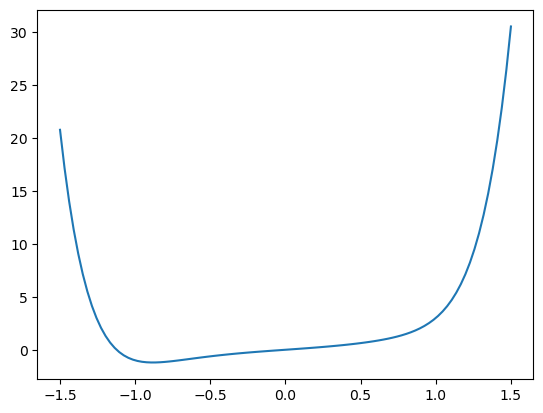

In [37]:
plt.plot(u, f(u))

We will construct some synthetic data based on this analytic function as the "truth"

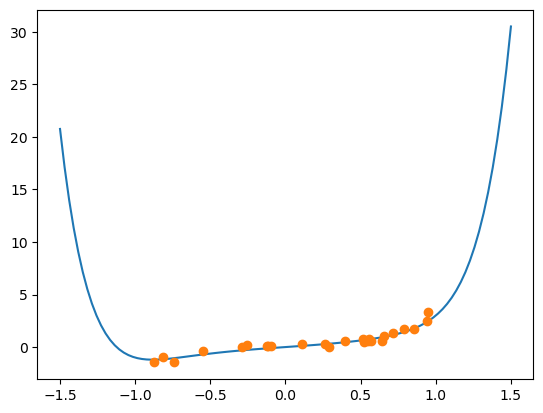

In [38]:
rng = np.random.default_rng(42)
x = rng.uniform(size=25)*2 - 1
y = f(x) + 0.4 * rng.normal(size=x.size)
plt.plot(u, f(u))
plt.plot(x, y, 'o')

Obviously, attempting to fit a linear model would fail to capture the behaviour at either end, but we could try fitting to a polynomial

In [40]:
X = np.array([x**0, x , x**2, x**3, x**4, x**5, x**6, x**7, x**8]).T
X.shape

(25, 9)

In [41]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
model.coef_

array([ 1.88176822e-01,  3.33588355e-03, -3.71966562e-01,  4.53831242e+00,
        6.84979634e-01, -4.08634261e+00, -2.89094986e+00,  1.95578674e+00,
        3.90445566e+00])

So it missed the polynomial terms we're looking for. We could try something like Lasso which will try to keep the sum of the regularization coefficients small (it penalizes large coefficeints and nonzero coefficients)

In [42]:
model = LassoCV()
model.fit(X, y)
model.coef_

array([ 0.        ,  0.19776886, -0.        ,  2.44962235,  0.        ,
        0.        ,  0.        ,  0.        ,  0.56719004])

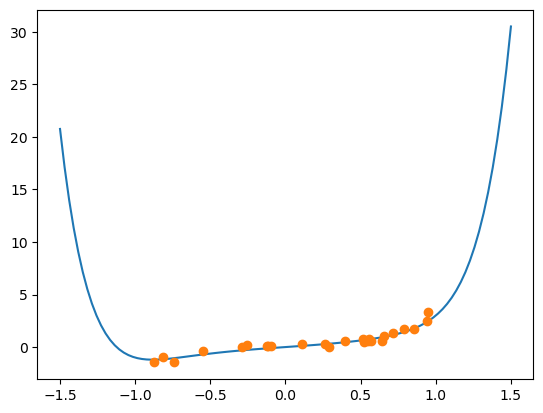

In [43]:
plt.plot(u, f(u))
#plt.plot(x, model.predict(X))
plt.plot(x, y, 'o')

In [44]:
U=np.array([u**0, u, u**2, u**3, u**4, u**5, u**6, u**7, u**8]).T
v = U @ model.coef_

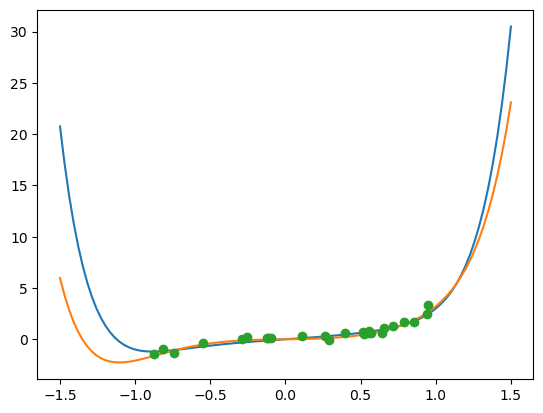

In [45]:
plt.plot(u, f(u))
plt.plot(u, v)
plt.plot(x, y, 'o')

In [46]:
model = RidgeCV()
model.fit(X, y)
model.coef_

array([ 0.        ,  0.5996873 , -0.30680823,  1.0568301 ,  0.12976265,
        0.70776484,  0.33713543,  0.50411818,  0.42891187])

In [47]:
U=np.array([u**0, u, u**2, u**3, u**4, u**5, u**6, u**7, u**8]).T
v = U @ model.coef_

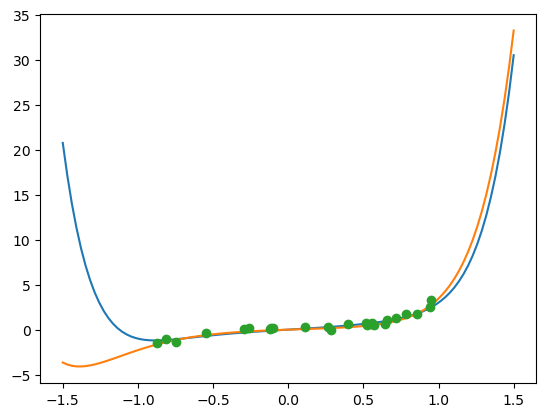

In [48]:
plt.plot(u, f(u))
plt.plot(u, v)
plt.plot(x, y, 'o')

In [49]:
P = PolynomialFeatures(degree=8)

In [50]:
XX = P.fit_transform(x.reshape(-1, 1))

In [51]:
np.allclose(XX, X)

True

## Pipelines

In [52]:
model = make_pipeline(P, LassoCV())
model.fit(x.reshape(-1, 1), y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=8)),
                ('lassocv', LassoCV())])

## Useful Resources

 * [Scikit-Learn User Guide](https://scikit-learn.org/stable/user_guide.html)
 * [Scikit-Learn Examples](https://scikit-learn.org/stable/auto_examples/index.html)
 * [Choosing the right estimator](https://scikit-learn.org/stable/machine_learning_map.html)